In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\krras\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'D:\kovai.co\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv')

In [4]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [5]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [7]:
df.isnull().sum()

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

In [8]:
df['Other'] = df['Other'].fillna(df['Other'].mean())

print("\nAfter handling missing values:")
print(df.isnull().sum())


After handling missing values:
Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)

In [10]:
df['Total'] = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].sum(axis=1)

In [11]:
max_total_day = df[df['Total'] == df['Total'].max()]
print("Most crowded day:")
print(max_total_day[['Date', 'Total']])

Most crowded day:
          Date  Total
241 2020-02-27  69752


In [12]:
df['School Change %'] = df['School'].replace(0, np.nan).pct_change() * 100
school_spike_day = df.loc[df['School Change %'].idxmax()]
print("Biggest spike in school passengers:")
print(school_spike_day[['Date', 'School', 'School Change %']])

Biggest spike in school passengers:
Date               2024-03-18 00:00:00
School                            5971
School Change %               597000.0
Name: 1722, dtype: object


C:\Users\krras\AppData\Local\Temp\ipykernel_31884\2849348126.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['School Change %'] = df['School'].replace(0, np.nan).pct_change() * 100


In [13]:
rail_more_than_local = df[df['Light Rail'] > df['Local Route']]
print("Days when Light Rail > Local Route:")
print(rail_more_than_local[['Date', 'Light Rail', 'Local Route']].head())

Days when Light Rail > Local Route:
         Date  Light Rail  Local Route
5  2019-07-06        6141         5214
6  2019-07-07        4332         4065
12 2019-07-13        5185         4606
19 2019-07-20        6692         5057
20 2019-07-21        4739         4045


In [14]:
correlation = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].corr()
print("Correlation between services:")
print(correlation)

Correlation between services:
              Local Route  Light Rail  Peak Service  Rapid Route    School
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795
Peak Service     0.944390    0.879347      1.000000     0.944997  0.728795
Rapid Route      0.965122    0.967736      0.944997     1.000000  0.754290
School           0.852356    0.685795      0.728795     0.754290  1.000000


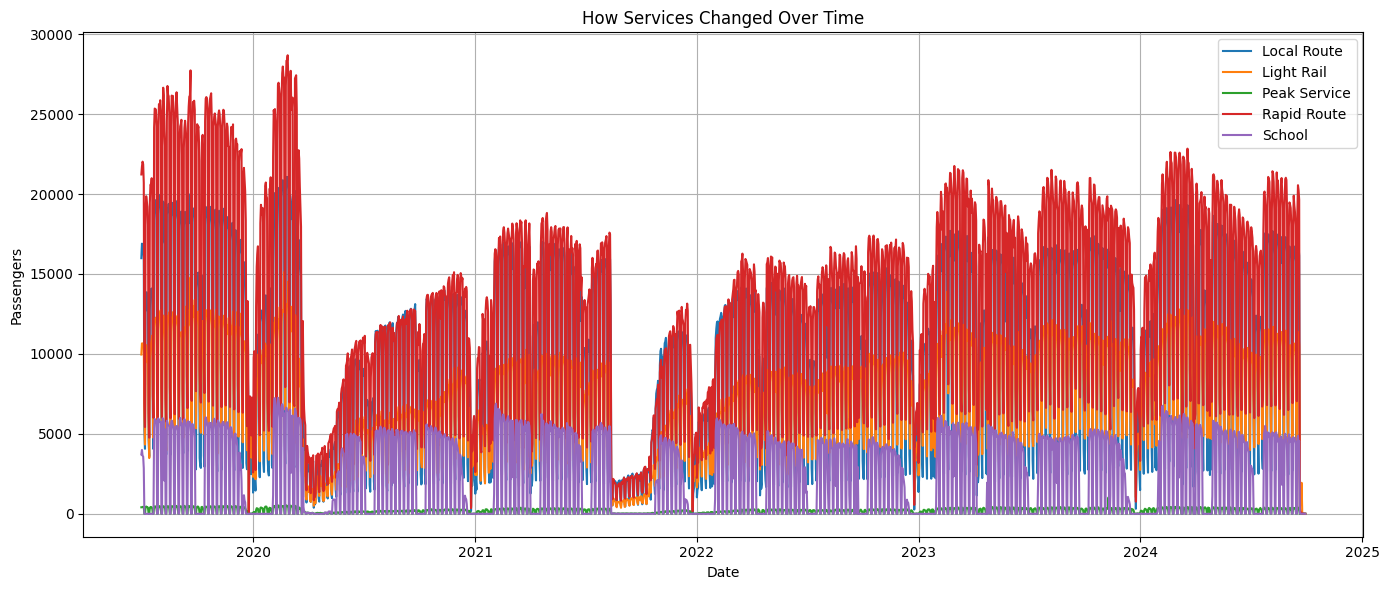

In [15]:
plt.figure(figsize=(14, 6))
for col in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.plot(df['Date'], df[col], label=col)

plt.title('How Services Changed Over Time')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

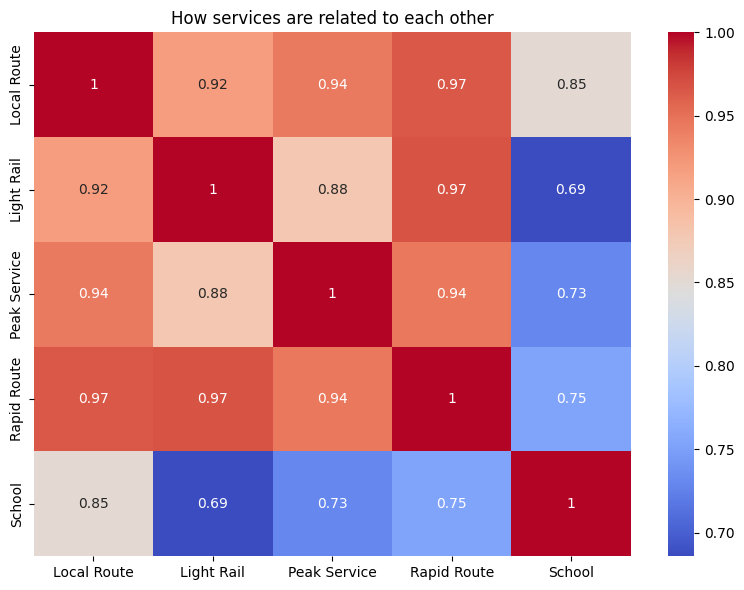

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('How services are related to each other')
plt.tight_layout()
plt.show()

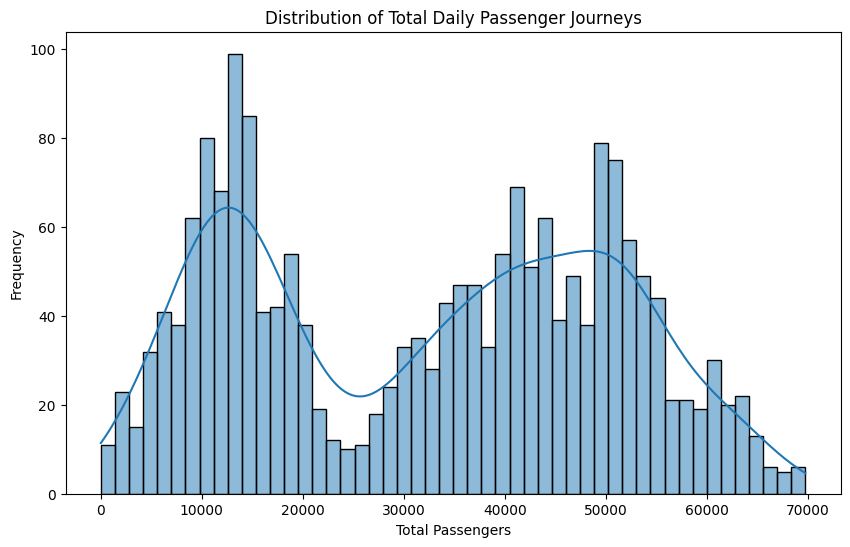

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=50, kde=True)
plt.title('Distribution of Total Daily Passenger Journeys')
plt.xlabel('Total Passengers')
plt.ylabel('Frequency')
plt.show()

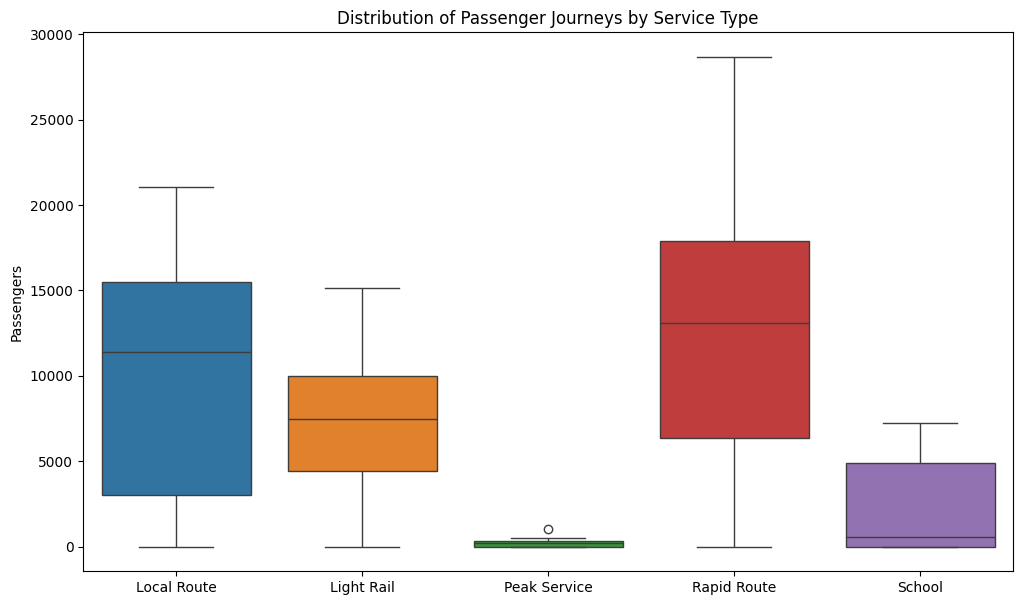

In [ ]:
# Box plot for each service type
plt.figure(figsize=(12, 7))
sns.boxplot(data=df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']])
plt.title('Distribution of Passenger Journeys by Service Type')
plt.ylabel('Passengers')
plt.show()

In [19]:
growth = df.iloc[-1][['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']] - df.iloc[0][['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']]
print("Overall growth from first to last day:")
print(growth.sort_values(ascending=False))


Overall growth from first to last day:
Peak Service      -407
School           -3715
Light Rail       -9962
Local Route     -15986
Rapid Route     -21220
dtype: object


In [20]:
std_dev = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].std()
print("Service stability (lower meanst that its more consistent):")
print(std_dev.sort_values())

Service stability (lower meanst that its more consistent):
Peak Service     156.532738
School          2494.766306
Light Rail      3345.616428
Local Route     6120.715714
Rapid Route     6720.494557
dtype: float64


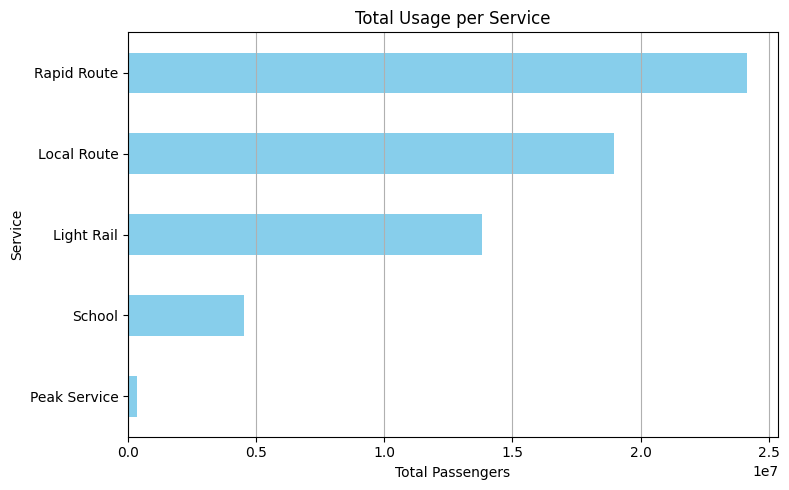

In [21]:
service_totals = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].sum()
service_totals.sort_values().plot(kind='barh', color='skyblue', figsize=(8, 5))
plt.title('Total Usage per Service')
plt.xlabel('Total Passengers')
plt.ylabel('Service')
plt.grid(axis='x')
plt.tight_layout()
plt.show()